# Mean-variance portfolio selection

### Import libraries

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#np.random.seed(1337)
#np.random.seed(178365)
np.random.seed(978351)

### Generate random data for 10 stocks

In [3]:
# Random data for 10 stocks
n = 10
Q = np.random.random((n,n))
Q = np.dot(Q,Q.T)/1000
# Q
mu = np.random.rand(n) / 100
# mu

### Step 1 - compute minimum variance portfolio

\begin{equation}
\begin{array}{rl}
\displaystyle \min_{w} & w^TQw \\
{\rm s.t.} & \sum_i w_i = 1\\
& w \geq 0
\end{array}
\end{equation}

In [4]:
w1 = cp.Variable(n)
prob1 = cp.Problem(cp.Minimize(cp.quad_form(w1, Q)),
                 [sum(w1) == 1,
                  w1 >= 0])
prob1.solve(solver=cp.CPLEX, verbose=True,cplex_params={"qpmethod": 6})

# Print results
print("\nSolution status: ", prob1.status)
print("Solution optimal value: ", prob1.value)
print("Solution w: ")
print(w1.value)

Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
CPXPARAM_QPMethod                                6
Parallel mode: deterministic, using up to 8 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 6 threads...
 * Starting primal Simplex on 1 thread...
Number of nonzeros in lower triangle of Q = 45
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.02 sec. (0.00 ticks)
Summary statistics for factor of Q:
  Rows in Factor            = 10
  Integer space required    = 10
  Total non-zeros in factor = 55
  Total FP ops to factor    = 385
Tried aggregator 1 time.
QP Presolve eliminated 10 rows and 0 columns.
Number of nonzeros in lower triangle of Q = 45
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.00 ticks)
Summary statistics for factor of Q:
  Rows in Factor            = 10
  Integer space required    = 10
  Total

In [5]:
# Check constraint
np.allclose(np.sum(w1.value),1)

True

In [6]:
w_minVar = w1.value
var_minVar = np.dot(w_minVar, np.dot(Q, w_minVar))
ret_minVar = np.dot(mu, w_minVar)
print("Minimum variance portfolio:\n")
print("   Solution status =", prob1.status)
print("    Solution value =", prob1.value)
print("          Variance =", var_minVar)
print("   Expected return =", ret_minVar)
print("Standard deviation =", np.sqrt(var_minVar))

Minimum variance portfolio:

   Solution status = optimal
    Solution value = 0.0018990924026013078
          Variance = 0.001899092402601308
   Expected return = 0.0032674778416423404
Standard deviation = 0.043578577335673864


### Step 2 - compute maximum return portfolio

\begin{equation}
\begin{array}{rl}
\displaystyle \max_{w} & \mu^Tw \\
{\rm s.t.} & \sum_i w_i = 1\\
& w \geq 0
\end{array}
\end{equation}

In [7]:
w2 = cp.Variable(n)
prob2 = cp.Problem(cp.Maximize(mu.T@w2),
                 [sum(w2) == 1,
                  w2 >= 0])
prob2.solve(solver=cp.CPLEX, verbose=True,cplex_params={"qpmethod": 6})

# Print results
print("\nSolution status: ", prob2.status)
print("Solution optimal value: ", prob2.value)
print("Solution w: ")
print(w2.value)

Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
CPXPARAM_QPMethod                                6
Tried aggregator 1 time.
LP Presolve eliminated 11 rows and 10 columns.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.00 ticks)

Solution status:  optimal
Solution optimal value:  0.00893492393857598
Solution w: 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
w_maxRet = w2.value
var_maxRet = np.dot(w_maxRet, np.dot(Q, w_maxRet))
ret_maxRet = np.dot(mu, w_maxRet)
print("Maximum return portfolio:\n")
print("   Solution status =", prob2.status)
print("    Solution value =", prob2.value)
print("   Expected return =", ret_maxRet)
print("          Variance =", var_maxRet)
print("Standard deviation =", np.sqrt(var_maxRet))

Maximum return portfolio:

   Solution status = optimal
    Solution value = 0.00893492393857598
   Expected return = 0.00893492393857598
          Variance = 0.004450415294550667
Standard deviation = 0.0667114330122706


### Step 3 - compute mean-variance efficient frontier

\begin{equation}
\begin{array}{rl}
\displaystyle \min_{w} & w^TQw \\
{\rm s.t.} & \mu^Tw \geq \varepsilon \\
&\sum_i w_i = 1\\
& w \geq 0
\end{array}
\end{equation}
\begin{equation}
\varepsilon \in [\varepsilon_{R_{\rm minVar}},\varepsilon_{R_{\rm maxRet}}]
\end{equation}

In [9]:
# Target returns
targetRet = np.linspace(ret_minVar,ret_maxRet,50)
targetRet

array([0.00326748, 0.00338314, 0.0034988 , 0.00361446, 0.00373013,
       0.00384579, 0.00396145, 0.00407711, 0.00419278, 0.00430844,
       0.0044241 , 0.00453976, 0.00465542, 0.00477109, 0.00488675,
       0.00500241, 0.00511807, 0.00523373, 0.0053494 , 0.00546506,
       0.00558072, 0.00569638, 0.00581205, 0.00592771, 0.00604337,
       0.00615903, 0.00627469, 0.00639036, 0.00650602, 0.00662168,
       0.00673734, 0.006853  , 0.00696867, 0.00708433, 0.00719999,
       0.00731565, 0.00743132, 0.00754698, 0.00766264, 0.0077783 ,
       0.00789396, 0.00800963, 0.00812529, 0.00824095, 0.00835661,
       0.00847228, 0.00858794, 0.0087036 , 0.00881926, 0.00893492])

In [10]:
# Define optimization problem and compute one portfolio on efficient frontier
w = cp.Variable(n)
eps = cp.Parameter()
eps.value = targetRet[0]
prob3 = cp.Problem(cp.Minimize(cp.quad_form(w, Q)),
                 [mu.T@w >= eps,
                  sum(w) == 1,
                  w >= 0])
prob3.solve(solver=cp.CPLEX, verbose=False,cplex_params={"qpmethod": 6})

# Print results
print("\nSolution status: ", prob3.status)
print("Solution optimal value: ", prob3.value)
print("Solution w: ")
print(w.value)


Solution status:  optimal
Solution optimal value:  0.0018990924026013078
Solution w: 
[0.         0.4020407  0.21289059 0.         0.         0.
 0.         0.38506871 0.         0.        ]


In [11]:
# Compute efficient frontier
w_front = []
var_front = []
ret_front = []
for epsilon in targetRet:
    eps.value = epsilon
    prob3.solve(solver=cp.CPLEX, verbose=False,cplex_params={"qpmethod": 6})
    w_front.append(w.value)
    var_front.append(np.dot(w.value, np.dot(Q, w.value)))
    ret_front.append(np.dot(mu, w.value))

Plot efficient frontier

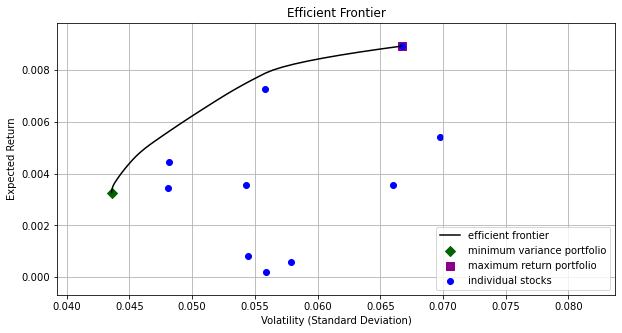

In [13]:
ax = plt.gca()
plt.rcParams['figure.figsize'] = [10, 5]
#plt.rcParams['figure.dpi'] = 200
    
# Plot volatility versus expected return for minimum variance portfolio
ax.scatter(x=np.sqrt(var_minVar), y=ret_minVar, marker='D', s=50,  color='DarkGreen', label='minimum variance portfolio')

# Plot volatility versus expected return for maximum return portfolio
ax.scatter(x=np.sqrt(var_maxRet), y=ret_maxRet,  marker='s', s=50, color='DarkMagenta', label='maximum return portfolio')

# Plot efficient frontier
ax.plot(np.sqrt(var_front), ret_front, 'k-', label='efficient frontier')

# Plot volatility versus expected return for individual stocks
ax.scatter(x=np.sqrt(np.diag(Q)), y=mu, color='Blue', label='individual stocks')

# Format and display the final plot
ax.axis([0.9*np.sqrt(var_minVar), 1.2*np.max(np.sqrt(np.diag(Q))), np.min(mu)-0.1*(np.max(mu)-np.min(mu)), 1.1*ret_maxRet])
ax.set_xlabel('Volatility (Standard Deviation)')
ax.set_ylabel('Expected Return')
plt.title('Efficient Frontier')
ax.legend(loc="lower right")
ax.grid()
plt.show()

### Define and solve CPLEX model directly without CVXPY

In [14]:
import cplex

In [15]:
cpx = cplex.Cplex()
cpx.objective.set_sense(cpx.objective.sense.minimize)

In [16]:
c  = [0.0] * n
lb = [0.0] * n
ub = [1.0] * n

In [17]:
A = []
for k in range(n):
    A.append([[0,1],[1.0,mu[k]]])
A

[[[0, 1], [1.0, 0.003576727911786397]],
 [[0, 1], [1.0, 0.00344522590632511]],
 [[0, 1], [1.0, 0.0007969492511468001]],
 [[0, 1], [1.0, 0.00018690160307030746]],
 [[0, 1], [1.0, 0.0035750515214236366]],
 [[0, 1], [1.0, 0.00893492393857598]],
 [[0, 1], [1.0, 0.005423138353068148]],
 [[0, 1], [1.0, 0.004447761567604534]],
 [[0, 1], [1.0, 0.007265204890217466]],
 [[0, 1], [1.0, 0.0005836669139738493]]]

In [18]:
var_names = ["w_%s" % i for i in range(1,n+1)]
var_names

['w_1', 'w_2', 'w_3', 'w_4', 'w_5', 'w_6', 'w_7', 'w_8', 'w_9', 'w_10']

In [19]:
cpx.linear_constraints.add(rhs=[1.0,ret_minVar], senses="EG")

range(0, 2)

In [20]:
cpx.variables.add(obj=c, lb=lb, ub=ub, columns=A, names=var_names)

range(0, 10)

In [21]:
Qmat = [[list(range(n)), list(2*Q[k,:])] for k in range(n)]

In [22]:
cpx.objective.set_quadratic(Qmat)

In [23]:
cpx.parameters.threads.set(4)
print("Setting number of threads = ", 4)

Setting number of threads =  4


In [24]:
# Disable CPLEX output to screen
cpx.set_results_stream(None)
cpx.set_warning_stream(None)

In [25]:
# Compute efficient frontier with CPLEX
w_frontC = []
var_frontC = []
ret_frontC = []
for epsilon in targetRet:
    cpx.linear_constraints.set_rhs(1,epsilon)
    cpx.solve()
    w_cur = cpx.solution.get_values()
    w_frontC.append(w_cur)
    var_frontC.append(np.dot(w_cur, np.dot(Q, w_cur)))
    ret_frontC.append(np.dot(mu, w_cur))

Plot efficient frontier produced directly with CPLEX solver without CVXPY

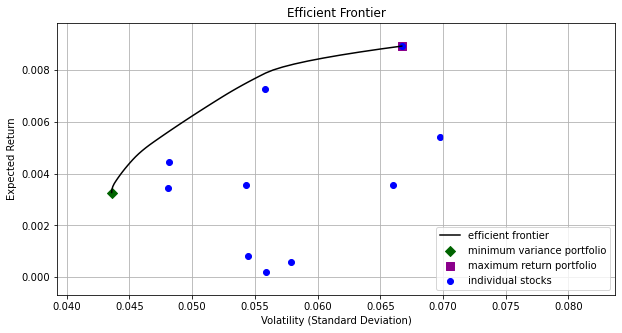

In [26]:
axC = plt.gca()
plt.rcParams['figure.figsize'] = [10, 5]
#plt.rcParams['figure.dpi'] = 200
    
# Plot volatility versus expected return for minimum variance portfolio
axC.scatter(x=np.sqrt(var_minVar), y=ret_minVar, marker='D', s=50,  color='DarkGreen', label='minimum variance portfolio')

# Plot volatility versus expected return for maximum return portfolio
axC.scatter(x=np.sqrt(var_maxRet), y=ret_maxRet,  marker='s', s=50, color='DarkMagenta', label='maximum return portfolio')

# Plot efficient frontier
axC.plot(np.sqrt(var_frontC), ret_frontC, 'k-', label='efficient frontier')

# Plot volatility versus expected return for individual stocks
axC.scatter(x=np.sqrt(np.diag(Q)), y=mu, color='Blue', label='individual stocks')

# Format and display the final plot
axC.axis([0.9*np.sqrt(var_minVar), 1.2*np.max(np.sqrt(np.diag(Q))), np.min(mu)-0.1*(np.max(mu)-np.min(mu)), 1.1*ret_maxRet])
axC.set_xlabel('Volatility (Standard Deviation)')
axC.set_ylabel('Expected Return')
plt.title('Efficient Frontier')
axC.legend(loc="lower right")
axC.grid()
plt.show()